# Colorado Education Data
### Nancy, Daniel, Eunice

### Outline

Using 3 years of school grading data of Colorado Public Schools, we attemp to uncover relationship between various factors of public education system

## Part I : Data Exploration

Note : the data was supplied by Kaggle.com. Data was organized and was put into one file using R script Data_Cleaning.R.


### 1. Get Data

#### a. Load Type

In [1]:
import numpy as np
import sys

data_2010_type = np.loadtxt("./CleanedData/Data_2010_Type.csv", delimiter = ",", dtype="string")
data_2011_type = np.loadtxt("./CleanedData/Data_2011_Type.csv", delimiter = ",", dtype="string")
data_2012_type = np.loadtxt("./CleanedData/Data_2012_Type.csv", delimiter = ",", dtype="string")
print(data_2010_type)
print(data_2011_type)
print(data_2012_type)


['"integer"' '"character"' '"character"' '"integer"' '"character"'
 '"character"' '"integer"' '"integer"' '"integer"' '"integer"' '"integer"'
 '"integer"' '"integer"' '"integer"' '"integer"' '"integer"' '"integer"'
 '"integer"' '"numeric"' '"integer"' '"integer"' '"integer"' '"integer"'
 '"integer"' '"integer"' '"integer"' '"integer"' '"numeric"' '"numeric"'
 '"numeric"' '"numeric"' '"numeric"' '"numeric"' '"numeric"' '"numeric"'
 '"numeric"']
['"integer"' '"character"' '"character"' '"integer"' '"character"'
 '"character"' '"integer"' '"integer"' '"integer"' '"integer"' '"integer"'
 '"integer"' '"integer"' '"integer"' '"integer"' '"integer"' '"integer"'
 '"integer"' '"numeric"' '"integer"' '"integer"' '"integer"' '"integer"'
 '"integer"' '"integer"' '"integer"' '"integer"' '"numeric"' '"numeric"'
 '"numeric"' '"numeric"' '"numeric"' '"numeric"' '"numeric"' '"numeric"'
 '"numeric"']
['"integer"' '"character"' '"character"' '"integer"' '"character"'
 '"character"' '"integer"' '"integer"

#### b. Load Name

In [2]:
data_2010_name = np.loadtxt("./CleanedData/Data_2010_Names.csv", delimiter = ",", dtype="string")

print(data_2010_name)


['"SchoolNumber"' '"EMH"' '"SchoolName"' '"DistrictNumber"'
 '"DistrictName"' '"EMHcombined"' '"AlternativeSchool"' '"SchoolGrade"'
 '"RankTotal"' '"OverallAchievedGrade"' '"ReadingAchievedGrade"'
 '"MathAchievedGrade"' '"WritingAchievedGrade"' '"ScienceAcheivedGrade"'
 '"OverallGrowthGrade"' '"ReadingGrowthGrade"' '"MathGrowthGrade"'
 '"WritingGrowthGrade"' '"GraduationRate"' '"ProficiencyTrend"'
 '"GrowthTrend"' '"OverallTrend"' '"ACTEnglish"' '"ACTMath"' '"ACTReading"'
 '"ACTScience"' '"TotalStudents"' '"PercentAmericanIndian"'
 '"PercentAsian"' '"PercentBlack"' '"PercentHispanic"' '"PercentWhite"'
 '"PercentPacificIslander"' '"PercentTwoOrMoreRace"'
 '"PercentFreeOrReducedLunch"' '"RemediationRate"']


#### c. Load Data

In [3]:
#data_2010 = np.genfromtxt('./Data_2010.csv', delimiter=',', dtype=data_types)
data_2010_raw = np.loadtxt("./CleanedData/Data_2010.csv",  delimiter=',', dtype=str)
data_2011_raw = np.loadtxt("./CleanedData/Data_2011.csv",  delimiter=',', dtype=str)
data_2012_raw = np.loadtxt("./CleanedData/Data_2012.csv",  delimiter=',', dtype=str)

print data_2010_raw[0,:]
print data_2011_raw[0,:]
print data_2012_raw[0,:]
print data_2010_raw.shape
print data_2011_raw.shape
print data_2012_raw.shape



#Use this If we want to combine the data
data_2010_raw = np.append(data_2010_raw, data_2011_raw, axis=0)
data_2010_raw = np.append(data_2010_raw, data_2012_raw, axis=0)
print data_2010_raw.shape

num_records = data_2010_raw.shape[0]
num_features = data_2010_raw.shape[1]
        

['10' '"H"' '"ABRAHAM LINCOLN HIGH SCHOOL"' '880' '"DENVER COUNTY 1"' '""'
 '0' '5' '285' '3' '3' '5' '3' '2' '7' '7' '6' '7' '65.9' '3' '2' '1' '0'
 '0' '0' '0' '1930' '0.9326425' '2.9015544' '0.984456' '91.6580311'
 '3.1606218' '0.0518135' '0.3108808' '93' '0.785714']
['10' '"H"' '"ABRAHAM LINCOLN HIGH SCHOOL"' '880' '"DENVER COUNTY 1"' '""'
 '0' '4' '315' '3' '3' '4' '3' '2' '6' '6' '6' '6' '51.7' '3' '2' '2' '2'
 '2' '2' '2' '1930' '0.9326425' '2.9015544' '0.984456' '91.6580311'
 '3.1606218' '0.0518135' '0.3108808' '93' '0.785714']
['10' '"H"' '"ABRAHAM LINCOLN HIGH SCHOOL"' '880' '"DENVER COUNTY 1"' '"H"'
 '0' '5' '270' '1' '1' '3' '1' '1' '7' '8' '6' '7' '64' '3' '2' '3' '2' '2'
 '2' '2' '1903' '0.7356805' '2.679979' '0.9984235' '91.3294798' '3.7834997'
 '0.1050972' '0.3678403' '92.96' '0.78']
(2082, 36)
(2069, 36)
(1962, 36)
(6113, 36)


Convert data to all-numeric

In [4]:
data_2010 = np.zeros((num_records,num_features))

for j in range(num_features-1):
    type = data_2010_type[j].lstrip('"').rstrip('"')
    if type =='numeric':
        for i in range(num_records) : 
            val = data_2010_raw[i][j].lstrip("'").rstrip("'")
            if(val != 'NA') : 
                data_2010[i,j] = float(val)
            else : 
                data_2010[i,j] = -1
    elif type == 'integer':
        for i in range(num_records) : 
            val = data_2010_raw[i][j].lstrip("'").rstrip("'")
            if(val != 'NA') : 
                data_2010[i,j] = int(val)
            else : 
                data_2010[i,j] = -1
    else : 
        string_to_num = {}
        dummy = 0
        for i in range(num_records) : 
            key =data_2010_raw[i][j].lstrip("'").rstrip("'") 
            if(key == 'NA' or key.isspace) : 
                data_2010[i,j] = -1
            elif key in string_to_num.keys():
                data_2010[i,j] = string_to_num[key]
            else :
                string_to_num[key] = dummy
                data_2010[i,j] = dummy
                dummy += 1
                
print data_2010.shape
data_2010[0,:]

(6113, 36)


array([  1.00000000e+01,  -1.00000000e+00,  -1.00000000e+00,
         8.80000000e+02,  -1.00000000e+00,  -1.00000000e+00,
         0.00000000e+00,   5.00000000e+00,   2.85000000e+02,
         3.00000000e+00,   3.00000000e+00,   5.00000000e+00,
         3.00000000e+00,   2.00000000e+00,   7.00000000e+00,
         7.00000000e+00,   6.00000000e+00,   7.00000000e+00,
         6.59000000e+01,   3.00000000e+00,   2.00000000e+00,
         1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   1.93000000e+03,
         9.32642500e-01,   2.90155440e+00,   9.84456000e-01,
         9.16580311e+01,   3.16062180e+00,   5.18135000e-02,
         3.10880800e-01,   9.30000000e+01,   0.00000000e+00])

##### One can access the actual string values from : data_2010_raw
##### One can access all-numeric version (each unique string gets a different number assigned) from : data_2010
Note that all NA vals are indicated as -1

In [5]:
print data_2010_raw[0:10,1]
print data_2010[0:10,1]
print data_2010_raw[0:10,5]
print data_2010[0:10,5]

['"H"' '"E"' '"M"' '"E"' '"E"' '"E"' '"H"' '"M"' '"E"' '"E"']
[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
['""' '""' '""' '""' '""' '""' '""' '""' '""' '""']
[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]


#### d. Load CodeBook

In [6]:
data_2010_codebook = np.loadtxt("./CleanedData/Data_2010_CodeBook.csv", delimiter = ",", dtype="string",skiprows=1)
data_2010_codebook

array([['SchoolNumber', 'Integer of School (Unique)'],
       ['EMH', 'E(Elementary) M(Middle) H(High)'],
       ['SchoolName', 'String of School Name'],
       ['DistrictNumber', 'Integer of District'],
       ['DistrictName', 'String of District Name'],
       ['EMHcombined',
        'EM / MH/ EMH (Combination of E/M/H to show which grades this school has or empty if only one school)'],
       ['AlternativeSchool', '1 - 2 (1 : Yes / 2 : No)'],
       ['SchoolGrade', '1 - 13 (13 being A+  1 being F)'],
       ['RankTotal', 'Total ranking out of all schools'],
       ['OverallAchievedGrade', '1 - 13 (13 being A+  1 being F)'],
       ['ReadingAchievedGrade', '1 - 13 (13 being A+  1 being F)'],
       ['MathAchievedGrade', '1 - 13 (13 being A+  1 being F)'],
       ['WritingAchievedGrade', '1 - 13 (13 being A+  1 being F)'],
       ['ScienceAcheivedGrade', '1 - 13 (13 being A+  1 being F)'],
       ['OverallGrowthGrade', '1 - 13 (13 being A+  1 being F)'],
       ['ReadingGrowthGrade', 

One can access the codebook as following : 

In [7]:
print "Name : " + data_2010_codebook[2][0] + " / Content :  " + data_2010_codebook[2][1]

Name : SchoolName / Content :  String of School Name


### 2. Explore Data


NOTE : WATCH OUT WHEN WE ARE EXPLORING DATA. Total grade was calculated using factors such as ACT, grade growth, and achievement grade...etc.  So there won't be much point looking at correlatoin between Total score and ACT_reading, for example. We should focus on correlation/relationship between the environmental factors such as location (district), FRL(free or reduced lunch price rate), race proportion with grade. 

# data_2010_codebook

In [8]:
data_2010_raw

array([['10', '"H"', '"ABRAHAM LINCOLN HIGH SCHOOL"', ..., '0.3108808',
        '93', '0.785714'],
       ['11', '"E"', '"ACADEMY CHARTER SCHOOL"', ..., '3.2857143', '8',
        'NA'],
       ['11', '"M"', '"ACADEMY CHARTER SCHOOL"', ..., '3.2857143', '8',
        'NA'],
       ..., 
       ['9791', '"M"', '"YUMA MIDDLE SCHOOL"', ..., '1.2552301', '64.02',
        'NA'],
       ['9795', '"E"', '"KENNETH P MORRIS ELEMENTARY SCHOOL"', ...,
        '1.6447368', '67.43', 'NA'],
       ['9799', '"H"', '"YUMA HIGH SCHOOL"', ..., '0', '53.16', 'NA']], 
      dtype='|S59')

In [9]:
data_2010

array([[  1.00000000e+01,  -1.00000000e+00,  -1.00000000e+00, ...,
          3.10880800e-01,   9.30000000e+01,   0.00000000e+00],
       [  1.10000000e+01,  -1.00000000e+00,  -1.00000000e+00, ...,
          3.28571430e+00,   8.00000000e+00,   0.00000000e+00],
       [  1.10000000e+01,  -1.00000000e+00,  -1.00000000e+00, ...,
          3.28571430e+00,   8.00000000e+00,   0.00000000e+00],
       ..., 
       [  9.79100000e+03,  -1.00000000e+00,  -1.00000000e+00, ...,
          1.25523010e+00,   6.40200000e+01,   0.00000000e+00],
       [  9.79500000e+03,  -1.00000000e+00,  -1.00000000e+00, ...,
          1.64473680e+00,   6.74300000e+01,   0.00000000e+00],
       [  9.79900000e+03,  -1.00000000e+00,  -1.00000000e+00, ...,
          0.00000000e+00,   5.31600000e+01,   0.00000000e+00]])

(6113,)
(5460,)


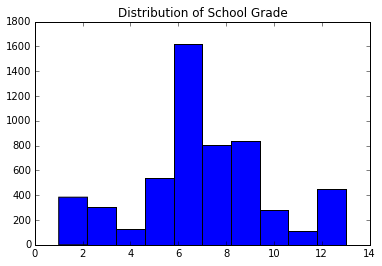

In [10]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

grades = data_2010[:,7]
print grades.shape
grades = grades[grades != -1]
print grades.shape

plt.hist(grades)
plt.title("Distribution of School Grade")

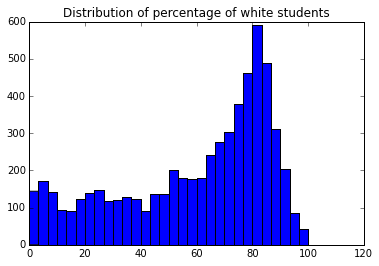

In [11]:
percentWhite = data_2010[:,31]
percentWhite = percentWhite[percentWhite != -1]
plt.hist(percentWhite, bins = 30)
plt.title("Distribution of percentage of white students")

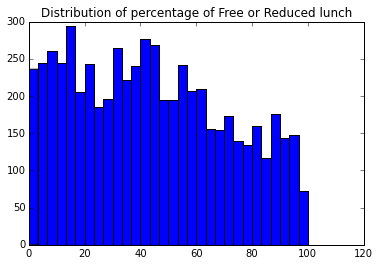

In [12]:
percentRFLunch = data_2010[:,34]
percentRFLunch = percentRFLunch[percentRFLunch != -1]
plt.hist(percentRFLunch, bins = 30)
plt.title("Distribution of percentage of Free or Reduced lunch")

In [13]:
print "Name : " + data_2010_codebook[7][0] + " / Content :  " + data_2010_codebook[7][1]
print "Name : " + data_2010_codebook[29][0] + " / Content :  " + data_2010_codebook[29][1]
print "Name : " + data_2010_codebook[30][0] + " / Content :  " + data_2010_codebook[30][1]
print "Name : " + data_2010_codebook[31][0] + " / Content :  " + data_2010_codebook[31][1]
print "Name : " + data_2010_codebook[34][0] + " / Content :  " + data_2010_codebook[34][1]

Name : SchoolGrade / Content :  1 - 13 (13 being A+  1 being F)
Name : PercentBlack / Content :  Percent
Name : PercentHispanic / Content :  Percent
Name : PercentWhite / Content :  Percent
Name : PercentFreeOrReducedLunch / Content :  Percent


In [14]:
TopAndBottomEthnicityIndex = [7,28,29,30,31] # Grade / Percent Asian / PercentBlack / PercentHispanic / PercentWhite 
TopAndBottomLunchIndex = [7,34] # Grade / Percent F/R Lunch
TopAndBottomEthnicity = data_2010[:,TopAndBottomEthnicityIndex]
TopAndBottomLunch = data_2010[:,TopAndBottomLunchIndex]

#Get rid of missing values
TopAndBottomLunch = TopAndBottomLunch[np.all(TopAndBottomLunch != -1, axis=1)]
TopAndBottomEthnicity = TopAndBottomEthnicity[np.all(TopAndBottomEthnicity != -1, axis=1)]
print(TopAndBottomLunch.shape)
print(TopAndBottomEthnicity.shape)

# Observe for different substes
TopEthnicity = TopAndBottomEthnicity[TopAndBottomEthnicity[:,0] >10 , :]
BottomEthnicity = TopAndBottomEthnicity[TopAndBottomEthnicity[:,0] <4, :] 
TopLunch = TopAndBottomLunch[TopAndBottomLunch[:,0] > 10, :]
BottomLunch = TopAndBottomLunch[TopAndBottomLunch[:,0] < 4, :]
print(TopEthnicity.shape) # About 10%
print(BottomEthnicity.shape) # About 13 %
print(TopLunch.shape) # About 10%
print(BottomLunch.shape) # About 13 %

#Now data is ready for plotting


(5457, 2)
(5457, 5)
(562, 5)
(687, 5)
(562, 2)
(687, 2)


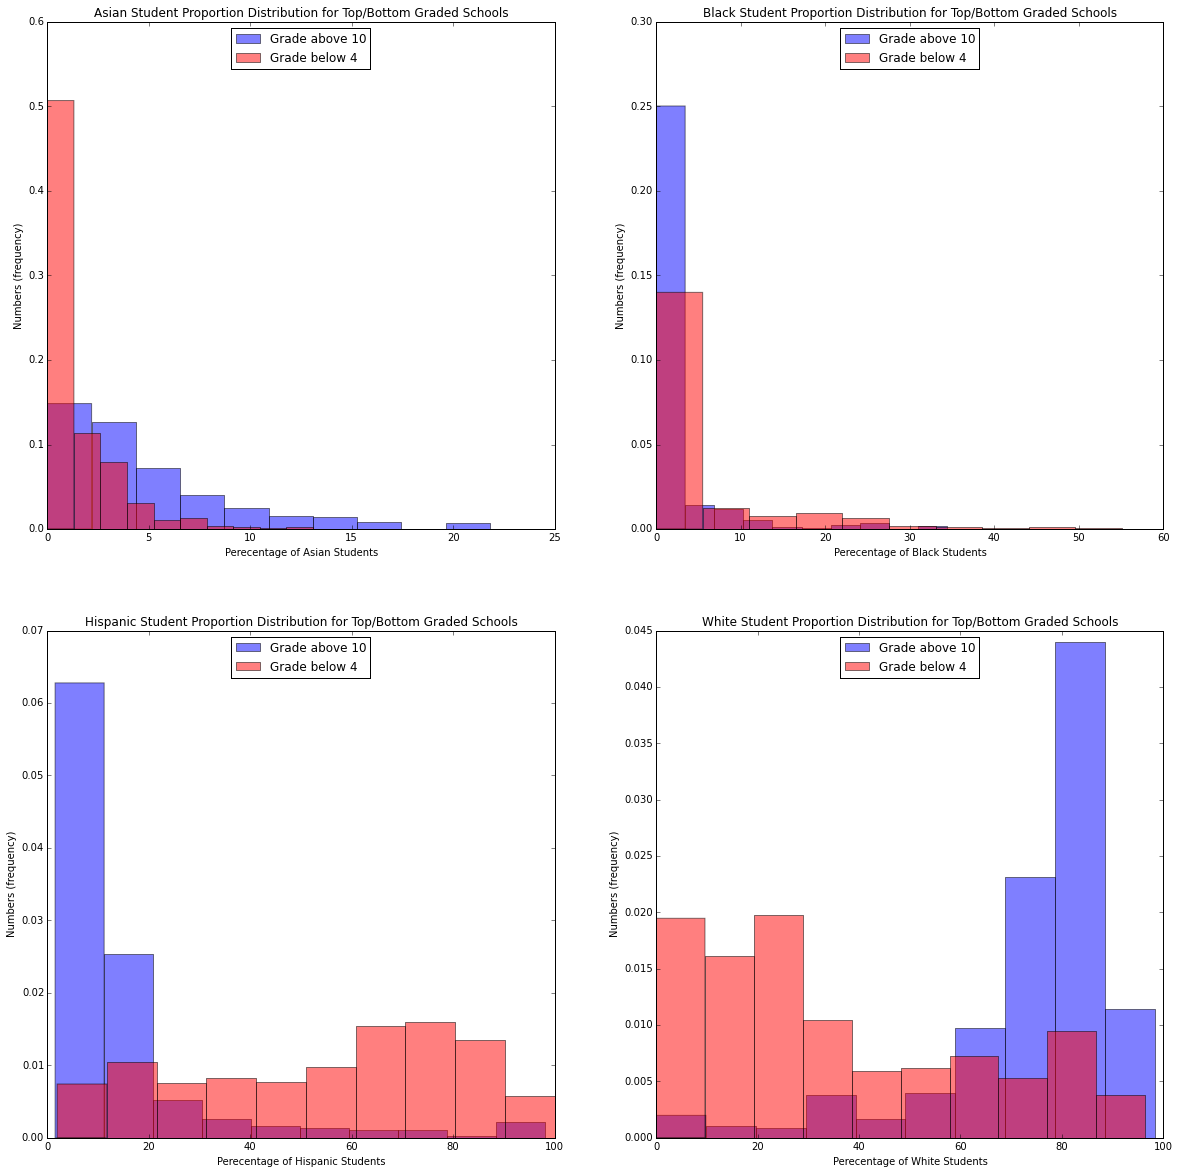

In [15]:
#Plot difference in ethnicities
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

f, axarr = plt.subplots(2, 2, figsize = (20,20))

#axarr[0,0].subplot(2,2,0)
axarr[0,0].set_title("Asian Student Proportion Distribution for Top/Bottom Graded Schools")
top = axarr[0,0].hist(TopEthnicity[:,1], alpha = 0.5, bins =10,label = "Grade above 10", normed='True')
bot = axarr[0,0].hist(BottomEthnicity[:,1], alpha = 0.5, bins =10,label = "Grade below 4", color = 'red', normed='True')
axarr[0,0].legend( loc = 'upper center')
axarr[0,0].set_xlabel("Perecentage of Asian Students")
axarr[0,0].set_ylabel("Numbers (frequency)")


axarr[0,1].set_title("Black Student Proportion Distribution for Top/Bottom Graded Schools")
top = axarr[0,1].hist(TopEthnicity[:,2], alpha = 0.5, bins =10,label = "Grade above 10", normed='True')
bot = axarr[0,1].hist(BottomEthnicity[:,2], alpha = 0.5, bins =10,label = "Grade below 4", color = 'red', normed='True')
axarr[0,1].legend( loc = 'upper center')
axarr[0,1].set_xlabel("Perecentage of Black Students")
axarr[0,1].set_ylabel("Numbers (frequency)")

axarr[1,0].set_title("Hispanic Student Proportion Distribution for Top/Bottom Graded Schools")
top = axarr[1,0].hist(TopEthnicity[:,3], alpha = 0.5, bins =10,label = "Grade above 10", normed='True')
bot = axarr[1,0].hist(BottomEthnicity[:,3], alpha = 0.5, bins =10,label = "Grade below 4", color = 'red', normed='True')
axarr[1,0].legend( loc = 'upper center')
axarr[1,0].set_xlabel("Perecentage of Hispanic Students")
axarr[1,0].set_ylabel("Numbers (frequency)")

axarr[1,1].set_title("White Student Proportion Distribution for Top/Bottom Graded Schools")
top = axarr[1,1].hist(TopEthnicity[:,4], alpha = 0.5, bins =10,label = "Grade above 10", normed='True')
bot = axarr[1,1].hist(BottomEthnicity[:,4], alpha = 0.5,bins =10, label = "Grade below 4", color = 'red', normed='True')
axarr[1,1].legend( loc = 'upper center')
axarr[1,1].set_xlabel("Perecentage of White Students")
axarr[1,1].set_ylabel("Numbers (frequency)")



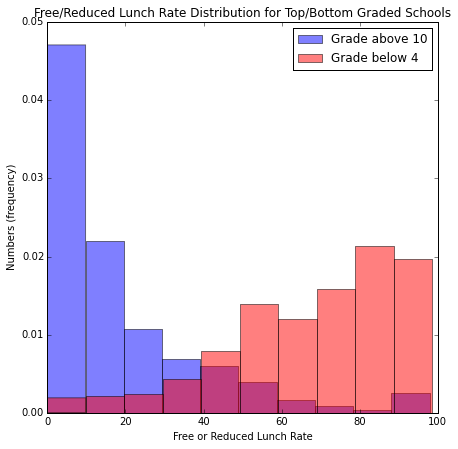

In [16]:
#Plot difference in Lunch
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize = (7,7))
plt.title("Free/Reduced Lunch Rate Distribution for Top/Bottom Graded Schools")
top = plt.hist(TopLunch[:,1], alpha = 0.5, label = "Grade above 10", normed='True')
bot = plt.hist(BottomLunch[:,1], alpha = 0.5, label = "Grade below 4", color = 'red', normed='True')
plt.legend( loc = 'upper right')
plt.xlabel("Free or Reduced Lunch Rate")
plt.ylabel("Numbers (frequency)")

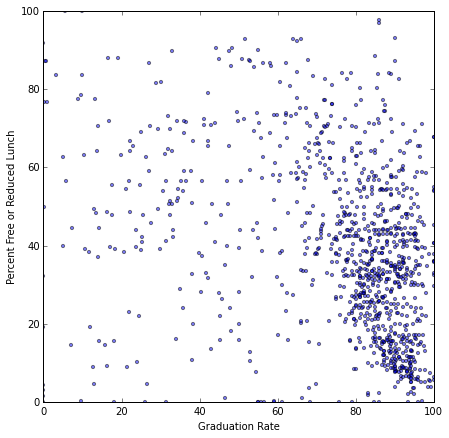

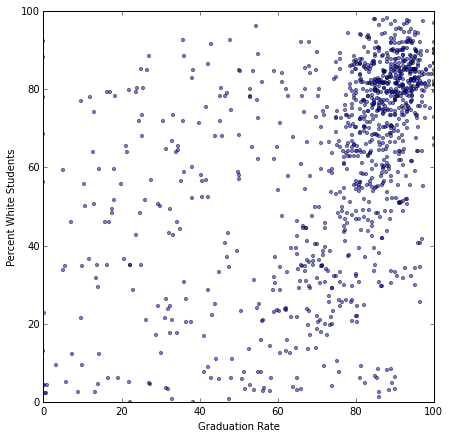

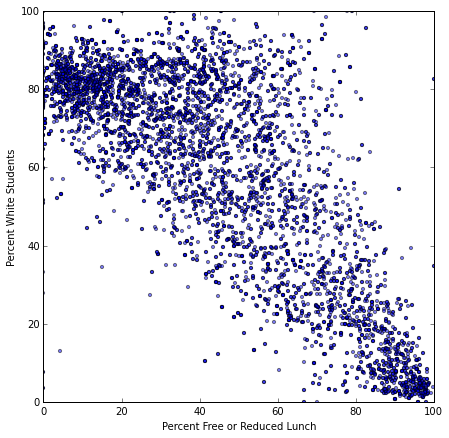

In [17]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(7,7))
plt.axis([0,100,0,100])
X = data_2010[:,18] #graduation rate, percent
Y = data_2010[:,34] #percent free or reduced lunch
plt.scatter(X,Y,alpha=0.5,s=10)
plt.xlabel("Graduation Rate")
plt.ylabel("Percent Free or Reduced Lunch")

plt.figure(figsize=(7,7))
plt.axis([0,100,0,100])
X = data_2010[:,18] #graduation rate, percent
Y = data_2010[:,31] #white students, percent
plt.scatter(X,Y,alpha=0.5,s=10)
plt.xlabel("Graduation Rate")
plt.ylabel("Percent White Students")

plt.figure(figsize=(7,7))
plt.axis([0,100,0,100])
X = data_2010[:,34] #percent free or reduced lunch
Y = data_2010[:,31] #white students, percent
plt.scatter(X,Y,alpha=0.5,s=10)
plt.xlabel("Percent Free or Reduced Lunch")
plt.ylabel("Percent White Students")

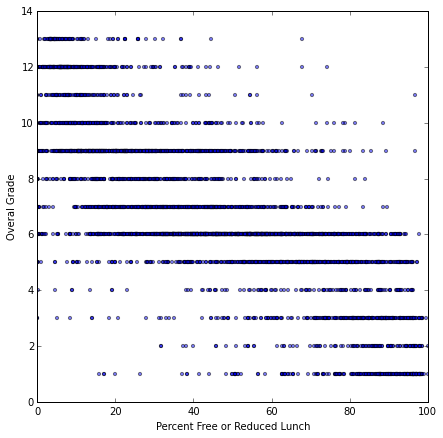

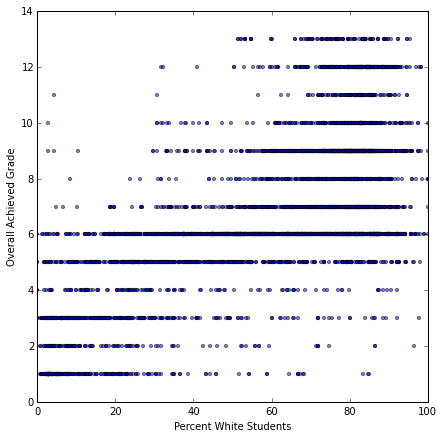

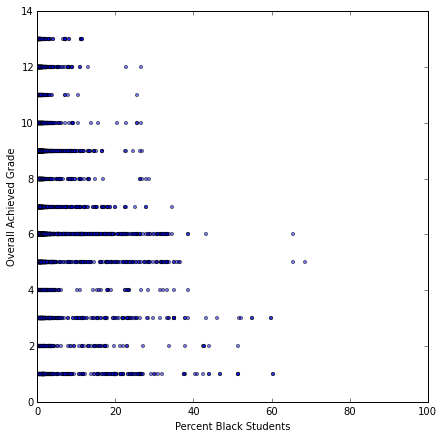

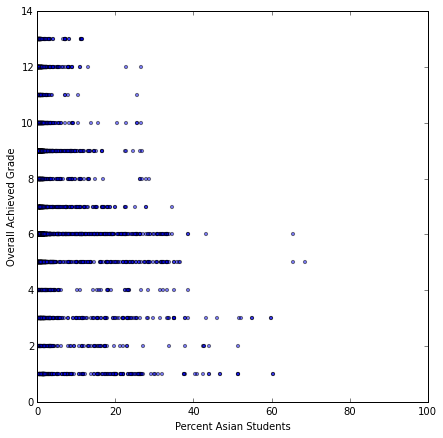

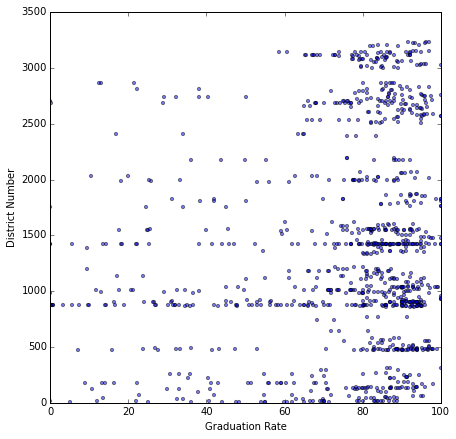

In [18]:
plt.figure(figsize=(7,7))
plt.axis([0,100,0,14])
X = data_2010[:,34] #percent free or reduced lunch
Y = data_2010[:,9] #overall grade
plt.scatter(X,Y,alpha=0.5,s=10)
plt.xlabel("Percent Free or Reduced Lunch")
plt.ylabel("Overal Grade")

plt.figure(figsize=(7,7))
plt.axis([0,100,0,14])
Y = data_2010[:,9] #overall achieved grade
X = data_2010[:,31] #white students, percent
plt.scatter(X,Y,alpha=0.5,s=10)
plt.ylabel("Overall Achieved Grade")
plt.xlabel("Percent White Students")

plt.figure(figsize=(7,7))
plt.axis([0,100,0,14])
Y = data_2010[:,9] #overall achieved grade
X = data_2010[:,29] #black students, percent
plt.scatter(X,Y,alpha=0.5,s=10)
plt.ylabel("Overall Achieved Grade")
plt.xlabel("Percent Black Students")

plt.figure(figsize=(7,7))
plt.axis([0,100,0,14])
Y = data_2010[:,9] #overall achieved grade
X = data_2010[:,29] #asian students, percent
plt.scatter(X,Y,alpha=0.5,s=10)
plt.ylabel("Overall Achieved Grade")
plt.xlabel("Percent Asian Students")

plt.figure(figsize=(7,7))
plt.axis([0,100,0,3500])
X = data_2010[:,18] #graduation rate, percent
Y = data_2010[:,3] #district number
plt.scatter(X,Y,alpha=0.5,s=10)
plt.xlabel("Graduation Rate")
plt.ylabel("District Number")

In [19]:
data_2010_raw[:,35]

array(['0.785714', 'NA', 'NA', ..., 'NA', 'NA', 'NA'], 
      dtype='|S59')

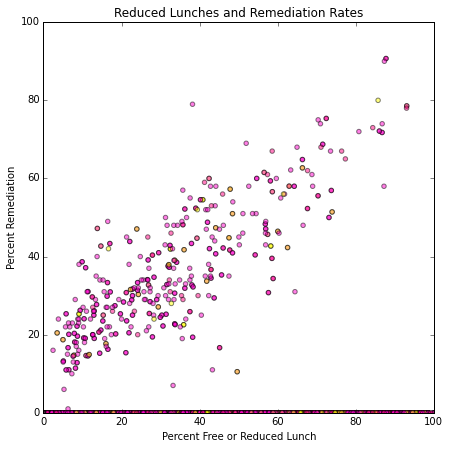

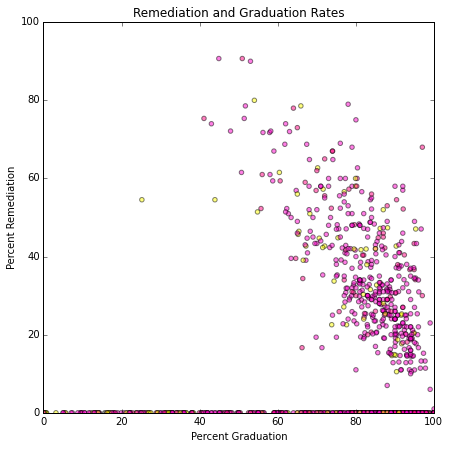

In [20]:
growth_grades = data_2010[:,14] #growth grade

growth_trends = data_2010[:,21] #growth trend (what's the difference?)

#get remediation data from file
remediation_strings = data_2010_raw[:,35]   #np.loadtxt("./CleanedData/Data_2010.csv", dtype='str', delimiter=",", usecols = [35])
remediation_data = np.zeros((num_records,1))
growth_trend_color_map = np.zeros((num_records, 3)) #np.zeros_like((num_records,1), dtype=[0, 0, 0])

for i in range(num_records):
    if growth_trends[i] == 1:
        growth_trend_color_map[i][0] = 1
        growth_trend_color_map[i][1] = 1
        growth_trend_color_map[i][2] = 0
    elif growth_trends[i] == 2:
        growth_trend_color_map[i][0] = 1
        growth_trend_color_map[i][1] = 0
        growth_trend_color_map[i][2] = 0.8
    elif growth_trends[i] == 3: 
        growth_trend_color_map[i][0] = 1
        growth_trend_color_map[i][1] = 0
        growth_trend_color_map[i][2] = 0.5
    else : # gray
        growth_trend_color_map[i][0] = 0.2
        growth_trend_color_map[i][1] = 0.2
        growth_trend_color_map[i][2] = 0.2
    if(remediation_strings[i] == "NA"):
        remediation_data[i] = 0;
    else:
        remediation_data[i] = float(remediation_strings[i]) * 100

plt.figure(figsize=(7,7))
plt.axis([0,100,0,100])
X = data_2010[:,34] #percent free or reduced lunch
Y = remediation_data #percent needing remediation before graduation
plt.scatter(X,Y,alpha=0.5,c = growth_trend_color_map)
plt.title("Reduced Lunches and Remediation Rates")
plt.xlabel("Percent Free or Reduced Lunch")
plt.ylabel("Percent Remediation")


plt.figure(figsize=(7,7))
plt.axis([0,100,0,100])
X = data_2010[:,18] #graduation rate, percent
Y = remediation_data #percent needing remediation before graduation

plt.scatter(X,Y, alpha = 0.5, c = growth_trend_color_map)
plt.title("Remediation and Graduation Rates")
plt.xlabel("Percent Graduation")
plt.ylabel("Percent Remediation")


#not much correlation with the colors, but a cool exercise if we can find patterns with the colors

## Analysis of Elementary Schools

### Using ethnicity proportion to predict Total Score

#### Get Relevant Data

In [21]:
#Using all the proportions
ethnic_sample = [7,27,28,29,30,31,32,33]

#Using just the white proportion
#ethnic_sample = [7,31]


ethnic_names = data_2010_name[ethnic_sample]
elementary_data = data_2010[data_2010_raw[:,1]=='"E"',:]


#If we want to consider all three types of schools
#elementary_data = data_2010

ethnic_elementary_data = elementary_data[:,ethnic_sample]
print (ethnic_elementary_data)

[[ 12.          0.2857143   2.1428571 ...,  83.5714286   0.          3.2857143]
 [ 11.          0.5805515  13.3526851 ...,  64.8766328   0.          5.0798258]
 [  7.          0.          2.2857143 ...,  60.3809524   0.          1.1428571]
 ..., 
 [  9.          1.1406844   1.9011407 ...,  24.5247148   0.3802281
    4.5627376]
 [  6.          0.          0.41841   ...,  46.4435146   0.          1.2552301]
 [ 10.          0.          0.3289474 ...,  43.75        0.          1.6447368]]


In [22]:
# Got rid of NA vals
ee_data = ethnic_elementary_data[np.all(ethnic_elementary_data != -1, axis=1)]
print(ethnic_names)
print(ee_data.shape)
print(ee_data)

['"SchoolGrade"' '"PercentAmericanIndian"' '"PercentAsian"'
 '"PercentBlack"' '"PercentHispanic"' '"PercentWhite"'
 '"PercentPacificIslander"' '"PercentTwoOrMoreRace"']
(2966, 8)
[[ 12.          0.2857143   2.1428571 ...,  83.5714286   0.          3.2857143]
 [ 11.          0.5805515  13.3526851 ...,  64.8766328   0.          5.0798258]
 [  7.          0.          2.2857143 ...,  60.3809524   0.          1.1428571]
 ..., 
 [  9.          1.1406844   1.9011407 ...,  24.5247148   0.3802281
    4.5627376]
 [  6.          0.          0.41841   ...,  46.4435146   0.          1.2552301]
 [ 10.          0.          0.3289474 ...,  43.75        0.          1.6447368]]


In [23]:
ee_target = ee_data[:,0]
ee_features = ee_data[:,1:]
print(ee_target)
print(ee_features)

[ 12.  11.   7. ...,   9.   6.  10.]
[[  0.2857143   2.1428571   0.2857143 ...,  83.5714286   0.          3.2857143]
 [  0.5805515  13.3526851   2.1770682 ...,  64.8766328   0.          5.0798258]
 [  0.          2.2857143   0.5714286 ...,  60.3809524   0.          1.1428571]
 ..., 
 [  1.1406844   1.9011407  16.730038  ...,  24.5247148   0.3802281
    4.5627376]
 [  0.          0.41841     0.        ...,  46.4435146   0.          1.2552301]
 [  0.          0.3289474   0.        ...,  43.75        0.          1.6447368]]


#### Divide into train/test sets

In [24]:
from sklearn.cross_validation import train_test_split
ee_features_train, ee_features_test, ee_target_train, ee_target_test = train_test_split(ee_features, ee_target, test_size=0.33, random_state=42)
print(ee_features_train.shape)
print(ee_features_test.shape)
print(ee_target_train.shape)
print(ee_target_test.shape)

(1987, 7)
(979, 7)
(1987,)
(979,)


#### K-NN

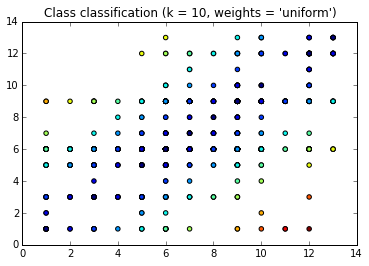

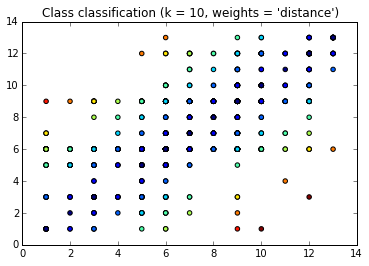

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors

n_neighbors = 10

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(ee_features_train, ee_target_train)
    ee_pred = clf.predict(ee_features_test)
    
    colors = {}

    colors = abs(ee_target_test - ee_pred)
    
    plt.figure()
    plt.scatter(ee_target_test, ee_pred, c= colors)

    # Plot also the training points
    plt.title("Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

[[ 10   0   6   0   5  26   3   0   1   0   0   0   0]
 [  2   1   4   0   8   8   0   0   1   0   0   0   0]
 [  3   4  13   2   7  17   0   1   7   0   0   0   0]
 [  0   1   5   0   3  12   1   1   1   0   0   0   0]
 [  1   5  12   4  12  40   2   3   9   0   0   1   0]
 [  2   4   9   2  30 163  26   4  34   6   0   3   1]
 [  0   1   2   0   3  33  14   9  26   3   3   6   0]
 [  0   0   0   0   0  11   8   7  14   2   1   2   0]
 [  1   1   2   0   1  30  20   9  52  14   5   7   1]
 [  1   0   0   0   0  13   3   2  19  10   2   9   2]
 [  0   0   0   1   0   2   2   0   6   3   1   4   0]
 [  0   0   1   0   0   3   1   1  15   7   6  26   4]
 [  0   0   0   0   0   1   0   0   0   0   1   6  13]]


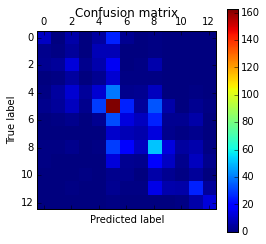

In [26]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ee_target_test, ee_pred)
print(cm)
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [27]:
#Computing various score metrics ( adapted from example provided by scikit-learn)
from sklearn import metrics


trueLabel = ee_target_test
predLabel = ee_pred

NB_ars = metrics.adjusted_rand_score(trueLabel, predLabel)
NB_vms = metrics.v_measure_score(trueLabel, predLabel)
NB_amis = metrics.adjusted_mutual_info_score(trueLabel, predLabel)
NB_mis = metrics.mutual_info_score(trueLabel, predLabel)

print("Adjusted Rand Score : %f" %(NB_ars))
print("V measure score : %f" %(NB_vms))
print("Adjusted Mutual Info score : %f" %(NB_amis))
print("Mutual Info score : %f" % (NB_mis))

Adjusted Rand Score : 0.112020
V measure score : 0.183552
Adjusted Mutual Info score : 0.144568
Mutual Info score : 0.391707


#### K-Means : Not a good idea

In [28]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=13, random_state=1)
k_means.fit(ee_features)
ee_pred = k_means.predict(ee_features)
ee_pred = [x+1 for x in ee_pred]
print(ee_pred)

[2, 11, 3, 9, 11, 11, 11, 3, 11, 6, 13, 2, 12, 12, 7, 13, 9, 6, 2, 13, 9, 1, 13, 13, 12, 1, 9, 5, 4, 2, 4, 13, 11, 13, 7, 2, 13, 7, 13, 2, 9, 9, 5, 8, 11, 13, 3, 8, 1, 4, 13, 13, 2, 13, 11, 8, 8, 8, 5, 7, 6, 2, 2, 6, 2, 1, 1, 1, 6, 1, 6, 7, 6, 7, 10, 11, 12, 6, 3, 9, 13, 7, 2, 13, 13, 6, 5, 13, 3, 9, 12, 11, 3, 6, 2, 9, 1, 13, 13, 2, 2, 1, 3, 13, 1, 9, 2, 9, 2, 13, 9, 4, 2, 9, 11, 2, 7, 8, 5, 2, 12, 2, 3, 13, 12, 7, 13, 2, 12, 9, 3, 11, 2, 13, 2, 13, 9, 9, 11, 2, 1, 2, 6, 9, 2, 11, 8, 8, 7, 13, 1, 9, 3, 5, 1, 13, 3, 1, 7, 7, 12, 12, 5, 1, 12, 12, 6, 11, 13, 9, 13, 9, 7, 9, 3, 11, 11, 2, 2, 13, 8, 2, 2, 13, 9, 13, 8, 13, 8, 12, 7, 8, 2, 2, 12, 3, 4, 2, 2, 13, 7, 4, 7, 9, 13, 8, 12, 7, 1, 1, 7, 10, 6, 13, 13, 2, 13, 13, 7, 13, 7, 11, 13, 13, 13, 13, 13, 11, 9, 13, 7, 13, 3, 2, 4, 2, 13, 11, 2, 2, 13, 12, 13, 1, 2, 13, 11, 5, 6, 5, 2, 2, 2, 1, 13, 13, 2, 1, 3, 13, 13, 13, 2, 8, 7, 11, 1, 11, 1, 13, 2, 2, 11, 6, 9, 7, 9, 6, 13, 7, 5, 7, 7, 3, 12, 2, 13, 13, 6, 1, 11, 2, 2, 12, 3, 9, 13, 6,

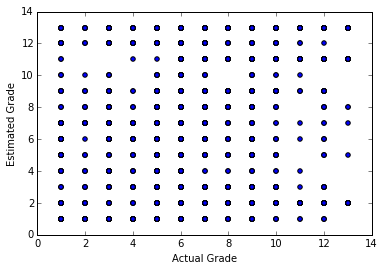

In [29]:
import matplotlib
import matplotlib.pyplot as plt

# otherwise all plots appear as pop-up
%matplotlib inline 

plt.scatter(ee_target, ee_pred)
plt.xlabel('Actual Grade')
plt.ylabel('Estimated Grade')

In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ee_target, ee_pred)
print(cm)

[[ 30  10   3   7  13  15  25   3   6   3   2   9   7]
 [ 12   7   4   4   3   1   9   4   4   1   0   3   5]
 [ 25   6   7  20   5  18  47   9   8   4   0   9  13]
 [ 11   4   7   4   5   8  10   3   2   0   1   8   7]
 [ 29  21  19  27  17  21  40  19  31   5   1  26  24]
 [ 47 105  95  22  38  55  49  79 102  17  18 103 115]
 [ 12  35  29   2   8  15  14  19  56   4  20  20  69]
 [  6  28  11   2   7   6   5  10  20   0  10   5  41]
 [  8  86  32   4  18  19   6  18  47   5  39   7 167]
 [  4  46  11   2   6   4   2   4  11   2  21   7  55]
 [  2  22   1   1   0   1   1   0   3   1  14   2  20]
 [  3  73   6   0   3   3   2   4   8   0  30   1  53]
 [  0  24   0   0   1   0   1   2   0   0  14   0  29]]


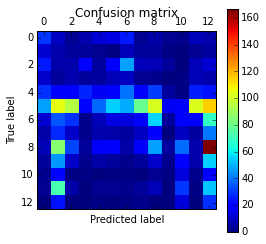

In [31]:
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [32]:
#Computing various score metrics ( adapted from example provided by scikit-learn)

trueLabel = ee_target
predLabel = ee_pred

NB_ars = metrics.adjusted_rand_score(trueLabel, predLabel)
NB_vms = metrics.v_measure_score(trueLabel, predLabel)
NB_amis = metrics.adjusted_mutual_info_score(trueLabel, predLabel)
NB_mis = metrics.mutual_info_score(trueLabel, predLabel)

print("Adjusted Rand Score : %f" %(NB_ars))
print("V measure score : %f" %(NB_vms))
print("Adjusted Mutual Info score : %f" %(NB_amis))
print("Mutual Info score : %f" % (NB_mis))

Adjusted Rand Score : 0.022680
V measure score : 0.088284
Adjusted Mutual Info score : 0.075824
Mutual Info score : 0.203921


### Naive Bayes : slightly better, but still not really

In [33]:
from sklearn import naive_bayes
from sklearn import metrics

gnb = naive_bayes.GaussianNB()
gnb.fit(ee_features_train,ee_target_train)
predict_c = gnb.predict(ee_features_test)


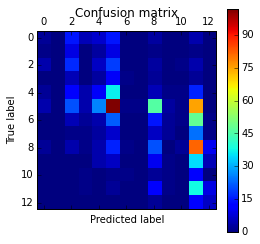

In [34]:
cm = confusion_matrix(ee_target_test, predict_c)
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [35]:
#Computing various score metrics ( adapted from example provided by scikit-learn)

trueLabel = ee_target_test
predLabel = predict_c

NB_ars = metrics.adjusted_rand_score(trueLabel, predLabel)
NB_vms = metrics.v_measure_score(trueLabel, predLabel)
NB_amis = metrics.adjusted_mutual_info_score(trueLabel, predLabel)
NB_mis = metrics.mutual_info_score(trueLabel, predLabel)

print("Adjusted Rand Score : %f" %(NB_ars))
print("V measure score : %f" %(NB_vms))
print("Adjusted Mutual Info score : %f" %(NB_amis))
print("Mutual Info score : %f" % (NB_mis))

Adjusted Rand Score : 0.040748
V measure score : 0.124699
Adjusted Mutual Info score : 0.084836
Mutual Info score : 0.248929


# Middle School

In [36]:
#Using all the proportions
freereduced_sample = [7,34]
freereduced_names = data_2010_name[freereduced_sample]
freereduced_data_M = data_2010_raw[data_2010_raw[:,1]=='"M"',:]
freereduced_data = data_2010[freereduced_data_M[:,34]!='NA',:]
freereduced_data = freereduced_data[:,freereduced_sample]
freereduced_data = freereduced_data[freereduced_data[:,0]!=-1,:]

In [37]:
fr_target = freereduced_data[:,0]
fr_features = freereduced_data[:,1]

In [38]:
from sklearn.cross_validation import train_test_split
fr_features_train, fr_features_test, fr_target_train, fr_target_test = train_test_split(fr_features, fr_target, test_size=0.33, random_state=42)

fr_features_train = fr_features_train.reshape((fr_features_train.shape[0],1))
fr_features_test = fr_features_test.reshape((fr_features_test.shape[0],1))
# fr_target_train = fr_target_train.reshape((1359,1))
# fr_target_test = fr_target_test.reshape((670,1))

print fr_features_train.shape
print fr_features_test.shape
print fr_target_train.shape
print fr_target_test.shape

(908, 1)
(448, 1)
(908,)
(448,)


### Decision Tree

In [39]:
# DECISION TREE CLASSIFIER
from sklearn import cross_validation
from sklearn import tree

dt = tree.DecisionTreeClassifier(max_depth=8)
dt.fit(fr_features_train, fr_target_train)
fr_pred_dt = dt.predict(fr_features_test)

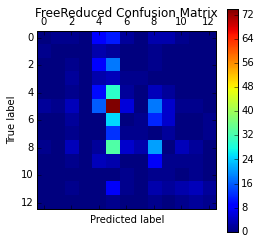

In [40]:
fr_cm = confusion_matrix(fr_target_test, fr_pred_dt)
fr_cm = confusion_matrix(fr_target_test, fr_pred_dt)
plt.matshow(fr_cm)
plt.title('FreeReduced Confusion Matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [41]:
#Computing various score metrics ( adapted from example provided by scikit-learn)

trueLabel = fr_target_test
predLabel = fr_pred_dt

NB_ars = metrics.adjusted_rand_score(trueLabel, predLabel)
NB_vms = metrics.v_measure_score(trueLabel, predLabel)
NB_amis = metrics.adjusted_mutual_info_score(trueLabel, predLabel)
NB_mis = metrics.mutual_info_score(trueLabel, predLabel)

print("Adjusted Rand Score : %f" %(NB_ars))
print("V measure score : %f" %(NB_vms))
print("Adjusted Mutual Info score : %f" %(NB_amis))
print("Mutual Info score : %f" % (NB_mis))

Adjusted Rand Score : 0.044197
V measure score : 0.137713
Adjusted Mutual Info score : 0.063029
Mutual Info score : 0.264550


### Regression

In [42]:
from sklearn import datasets, linear_model

regr = linear_model.LinearRegression()
regr.fit(fr_features_train, fr_target_train)
fr_pred_reg = regr.predict(fr_features_test)

fr_pred_reg = np.round(fr_pred_reg)

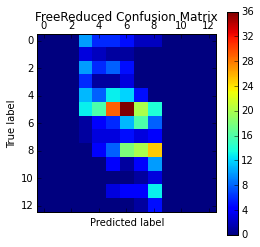

In [43]:
reg_cm = confusion_matrix(fr_target_test, fr_pred_reg)
reg_cm = confusion_matrix(fr_target_test, fr_pred_reg)
plt.matshow(reg_cm)
plt.title('FreeReduced Confusion Matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [44]:
#Computing various score metrics ( adapted from example provided by scikit-learn)

trueLabel = fr_target_test
predLabel = fr_pred_reg

NB_ars = metrics.adjusted_rand_score(trueLabel, predLabel)
NB_vms = metrics.v_measure_score(trueLabel, predLabel)
NB_amis = metrics.adjusted_mutual_info_score(trueLabel, predLabel)
NB_mis = metrics.mutual_info_score(trueLabel, predLabel)

print("Adjusted Rand Score : %f" %(NB_ars))
print("V measure score : %f" %(NB_vms))
print("Adjusted Mutual Info score : %f" %(NB_amis))
print("Mutual Info score : %f" % (NB_mis))



Adjusted Rand Score : 0.036364
V measure score : 0.127838
Adjusted Mutual Info score : 0.084726
Mutual Info score : 0.251801


## All Schools Combined
### Looking at Ethnicity & Free/Reduced Lunches

In [45]:
overall_sample = [7,31,34]
overall_names = data_2010_name[overall_sample]
overall_data_1 = data_2010_raw[data_2010_raw[:,31]!='NA',:]
overall_data = data_2010[overall_data_1[:,34]!='NA',:]
overall_data = overall_data[:,overall_sample]
overall_data = overall_data[overall_data[:,0]!=-1,:]
print overall_data

[[  5.          3.1606218  93.       ]
 [ 12.         83.5714286   8.       ]
 [ 13.         83.5714286   8.       ]
 ..., 
 [  7.         78.5058978  28.18     ]
 [  6.         53.1881804  45.88     ]
 [ 11.          4.0540541  92.34     ]]


In [46]:
overall_target = overall_data[:,0]
overall_features = overall_data[:,1:]

In [47]:
from sklearn.cross_validation import train_test_split
overall_features_train, overall_features_test, overall_target_train, overall_target_test = train_test_split(overall_features, overall_target, test_size=0.33, random_state=42)

#fr_features_train = fr_features_train.reshape((fr_features_train.shape[0],1))
# fr_features_test = fr_features_test.reshape((fr_features_test.shape[0],1))
# fr_target_train = fr_target_train.reshape((1359,1))
# fr_target_test = fr_target_test.reshape((670,1))

print overall_features_train.shape
print overall_features_test.shape
print overall_target_train.shape
print overall_target_test.shape

(3586, 2)
(1767, 2)
(3586,)
(1767,)


## Regression

In [48]:
from sklearn import datasets, linear_model

regr = linear_model.LinearRegression()
regr.fit(overall_features_train, overall_target_train)
overall_pred_reg = regr.predict(overall_features_test)

overall_pred_reg = np.round(overall_pred_reg)

overall_pred_reg

array([ 9.,  6.,  4., ...,  4.,  8.,  8.])

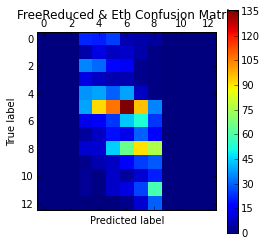

In [49]:
reg_cm = confusion_matrix(overall_target_test, overall_pred_reg)
reg_cm = confusion_matrix(overall_target_test, overall_pred_reg)
plt.matshow(reg_cm)
plt.title('FreeReduced & Eth Confusion Matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [50]:
#Computing various score metrics ( adapted from example provided by scikit-learn)

trueLabel = overall_target_test
predLabel = overall_pred_reg

NB_ars = metrics.adjusted_rand_score(trueLabel, predLabel)
NB_vms = metrics.v_measure_score(trueLabel, predLabel)
NB_amis = metrics.adjusted_mutual_info_score(trueLabel, predLabel)
NB_mis = metrics.mutual_info_score(trueLabel, predLabel)

print("Adjusted Rand Score : %f" %(NB_ars))
print("V measure score : %f" %(NB_vms))
print("Adjusted Mutual Info score : %f" %(NB_amis))
print("Mutual Info score : %f" % (NB_mis))

Adjusted Rand Score : 0.042162
V measure score : 0.101947
Adjusted Mutual Info score : 0.084263
Mutual Info score : 0.203726


## Bagging

In [51]:
# NAIVE-BAYES & BAGGING
from sklearn.cross_validation import train_test_split
from sklearn import naive_bayes
from sklearn import metrics 
from sklearn import ensemble 

bagging = ensemble.BaggingClassifier(base_estimator=naive_bayes.GaussianNB(), n_estimators=10)
bagging.fit(overall_features_train, overall_target_train)
overall_pred_bagging = bagging.predict(overall_features_test)

overall_pred_bagging

array([ 9.,  6.,  3., ...,  3.,  9.,  9.])

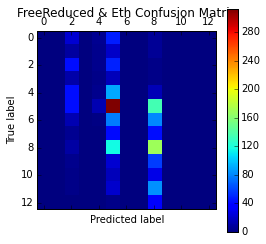

In [52]:
bagging_cm = confusion_matrix(overall_target_test, overall_pred_bagging)
bagging_cm = confusion_matrix(overall_target_test, overall_pred_bagging)
plt.matshow(bagging_cm)
plt.title('FreeReduced & Eth Confusion Matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [53]:
#Computing various score metrics ( adapted from example provided by scikit-learn)

trueLabel = overall_target_test
predLabel = overall_pred_bagging

NB_ars = metrics.adjusted_rand_score(trueLabel, predLabel)
NB_vms = metrics.v_measure_score(trueLabel, predLabel)
NB_amis = metrics.adjusted_mutual_info_score(trueLabel, predLabel)
NB_mis = metrics.mutual_info_score(trueLabel, predLabel)

print("Adjusted Rand Score : %f" %(NB_ars))
print("V measure score : %f" %(NB_vms))
print("Adjusted Mutual Info score : %f" %(NB_amis))
print("Mutual Info score : %f" % (NB_mis))

Adjusted Rand Score : 0.054136
V measure score : 0.096906
Adjusted Mutual Info score : 0.067010
Mutual Info score : 0.159391
